<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_9/9_4_Named_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition w. Spacy


---

Spacy is a NLP library for text processing, including tokenization, part-of-speech tagging, dependency parsing, and named entity recognition (NER). Named entity recognition(NER) involves identifying and extracting entities, such as people, organizations, locations, and dates, from unstructured text data.

In this notebook, we will focus on the using pattern based entity recognition (simply look for twitter users @username, urls, and hashtags) then we'll dive into the entity recognition functionality of Spacy and explore how it can be used to extract People, Places, Organizations and Locations  from text data. 

By the end of this notebook, you should have a good understanding of how Spacy can be used for entity recognition and how it can be incorporated into your own NLP workflows. Let's get started!

In [1]:
# step one install spacy! 
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# load our libraries 
import warnings
warnings.filterwarnings('ignore')

# standard libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import string
import re

# spacy and wordclouds   
import spacy
from wordcloud import WordCloud


# Tweets again! 


---

Let's look at tweets by Bari Weiss!. She is an American journalist, author, and commentator known for her work on a wide range of political and cultural topics. She began her career as an op-ed and book review editor at The Wall Street Journal, where she later became a staff writer and editor for the opinion section. In 2017, she joined The New York Times as an opinion writer and editor, where she wrote columns on topics such as free speech, Israel and Jewish identity, and cultural and political trends.

Most recenty she is part of the crew looking into the TwitterFiles! 

In [3]:
tweets = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_9/data/bariweiss_tweets_4.7.2023.csv")
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quote_count,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2023-04-06T18:05:05Z,1.644039e+18,1644038531512164353,Can ten earnest kids playing Bach become the n...,False,143,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-05T16:57:45Z,1.643659e+18,1643659198415216641,"For 11 years, Mark Swidan has languished in a ...",False,277,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-04T16:19:21Z,1.643287e+18,1643287145753239556,Today the resistance will get what it's been c...,False,129,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-04T16:05:44Z,1.643284e+18,1643283720529387520,As Jews across the world celebrate our liberat...,False,135,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-03T15:19:41Z,1.642910e+18,1642909745525985280,New York City Mayor Eric Adams on today’s epis...,False,93,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pattern based Entity Extraction


---


Question what other twitter users is Bari mentioning? We don't need fancy entity extraction models for this. instead wesimply extract all the twitter users that have been referenced in tweets by detecting "@username" basically words starting with "@". To do this we'll use the "startswith" function - then clean everything up and dump it into a dataframe and summarize it. 




In [37]:
# extract all the @username mentions in tweets and create a dataframe of users
users_df = pd.DataFrame({'users': []})
for tweet in tweets['full_text']:
    for word in tweet.split():
        if word.startswith('@'):
            # remove punctuation and lowercase the username
            word = (word
                    .lower()
                    .replace("'s", "")
                    .replace(":","")
                    .replace("’s","")
                    .replace(".","")
                    .replace("?","")
                    .replace("!","")
                    .replace(" ","")
            )
            users_df = users_df.append({'users': word}, ignore_index=True)

# now summarize the users 
mentions_freq = pd.DataFrame(users_df['users'].value_counts()).reset_index().rename(columns={"index":"username"})
mentions_freq.head(10)


,username,users
0,@thehonestlypod,57
1,@nelliebowles,44
2,@thefp,39
3,@snoozyweiss,24
4,@petersavodnik,20
5,@abigailshrier,16
6,@uaustinorg,12
7,@douglaskmurray,12
8,@meganphelps,10
9,@tabletmag,10


# Other Patterns


---

We can follow the same pattern of splitting the text by space into an array then looping through the array of words looking for things that start with our pattern. simply cleanup the pattern and append to a dataframe then summarize. 

let's look for : 
- URLs - look for words starting with "https://"
- HashTags - look for words starting with "#" 



In [38]:
# extract all the URLs mentions in tweets and create a dataframe of URL
http_df = pd.DataFrame({'url': []})
for tweet in tweets['full_text']:
    for word in tweet.split():
        if word.startswith('https://'):
            # remove punctuation and lowercase the username
            word = (word
                    #.lower()
                    #.replace("'s", "")
                    #.replace(":","")
                    #.replace("’s","")
                    #.replace(".","")
                    #.replace("?","")
                    #.replace("!","")
                    #.replace(" ","")
            )
            http_df = http_df.append({'url': word}, ignore_index=True)

# now summarize the users 
http_freq = pd.DataFrame(http_df['url'].value_counts()).reset_index().rename(columns={"index":"url"})
http_freq.head(10)

,url,url
0,https://t.co/CAHS64JEfV,5
1,https://t.co/dLGWVoudHq,5
2,https://t.co/zIMveD3IXN,5
3,https://t.co/cffHLQWOsF,5
4,https://t.co/AdqksaD1PL,4
5,https://t.co/mKPPTIe4pH,4
6,https://t.co/C08n30n1hh,4
7,https://t.co/VwjVEoYipZ,4
8,https://t.co/6YigIXVNzx,4
9,https://t.co/CZ9MHFZjme,4


In [39]:
# extract all the HashTags mentions in tweets and create a dataframe of HashTags
hashtag_df = pd.DataFrame({'hashtag': []})
for tweet in tweets['full_text']:
    for word in tweet.split():
        if word.startswith('#'):
            # remove punctuation and lowercase the username
            word = (word
                    #.lower()
                    .replace("'s", "")
                    .replace(":","")
                    .replace("’s","")
                    .replace(".","")
                    .replace("?","")
                    .replace("!","")
                    .replace(")","")
                    .replace(" ","")
            )
            hashtag_df = hashtag_df.append({'hashtag': word}, ignore_index=True)

# now summarize the users 
hashtag_freq = pd.DataFrame(hashtag_df['hashtag'].value_counts()).reset_index().rename(columns={"index":"hashtag"})
hashtag_freq

,hashtag,hashtag
0,#FreeEvan,1
1,#HillaryOnHulu,1
2,#chinaprotests,1
3,#FreedomConvoyCanada2022,1
4,#JussieSmollett,1
5,#AfghanEvac,1
6,#DigitalDunkirk,1


# Spacy


---

1. Install Spacy: If you haven't already, you need to install Spacy and its language model(s) of choice. 
```python
# install spacy and download en_core_web_sm
!pip install spacy
!python -m spacy download en_core_web_sm
```

2. Load the language model: This will create a Spacy object that you can use to process your text data.
```python
# Load the pre-trained Spacy model
nlp = spacy.load("en_core_web_sm")
``` 

3. Process the text: This involves passing your text through the Spacy object using the nlp() method, which applies a series of text processing and analysis operations to the input text and returns a **processed Spacy document** object.

4, Access the processed data: Now that you have a Spacy document you can access extract annotations like tokens, part-of-speech tags, named entities, and more. 



> First let's look at a really simple example then look at how we can automate the extraction of entities. 





In [40]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Process Bleacher Report https://bleacherreport.com/articles/10067977-2023-nfl-draft-big-board-br-nfl-scouting-depts-post-combine-rankings

bleacher_report = """
The excitement was palpable coming out of the 2023 NFL Scouting Combine.
Unlike last year, when so many tried to forcibly drive the value of a poor quarterback class up draft boards, the incoming crop dazzled while working out at Lucas Oil Stadium.
Buzz circulated throughout the streets of Indianapolis about the talent found in this class, and not just at quarterback. The overall athletic caliber found in this class is outstanding.
Those workouts confirmed what's already been seen on tape. Generally, those who were expected to test well did so. In some cases—like Florida's Anthony Richardson—they exceeded previous assumptions.
Evaluations never stop, and Bleacher Report's Scouting Department remains hard at work to break down this year's incoming crop of talent after a week with their boots on the ground at the combine.
Brandon Thorn: Brandon is the author of the Trench Warfare Newsletter, which focuses exclusively on offensive and defensive line evaluation. He also contributes as an analyst for Establish the Run and is the scouting coordinator for OL Masterminds.
Derrik Klassen: Derrik shifted from evaluating the defensive front to offensive skill positions this year while also contributing to Football Outsiders and the New York Times. He has spent years charting and evaluating NFL prospects, which can often be found through social media.
Cory Giddings: Cory has experience working at multiple levels of football, both in coaching and player evaluation. In recent years, he has worked with the New York Giants and with collegiate teams in the Big Ten. He serves as the director of player personnel at UCF.
Matt Holder: Matt joined the team this year. He played college football, worked in college recruiting and is a Scouting Academy graduate. He has covered the NFL draft since 2019 and writes about the Las Vegas Raiders for SB Nation's Silver and Black Pride.
Brent Sobleski: Brent is as an NFL analyst for Bleacher Report. He's covered the draft since the 2004 class for multiple outlets, including nine seasons with B/R.
"""

doc = nlp(bleacher_report)

# Access the entities data
for ent in doc.ents:
  print("Spacy found: {} a {} in the text".format(ent.text, ent.label_))

Spacy found: 2023 a DATE in the text
Spacy found: NFL a ORG in the text
Spacy found: Scouting Combine a PERSON in the text
Spacy found: last year a DATE in the text
Spacy found: Lucas Oil Stadium a FAC in the text
Spacy found: Buzz a PERSON in the text
Spacy found: Indianapolis a GPE in the text
Spacy found: Florida a GPE in the text
Spacy found: Anthony Richardson a PERSON in the text
Spacy found: Bleacher Report's a ORG in the text
Spacy found: year a DATE in the text
Spacy found: a week a DATE in the text
Spacy found: Brandon Thorn a PERSON in the text
Spacy found: Brandon a PERSON in the text
Spacy found: the Trench Warfare Newsletter a ORG in the text
Spacy found: Establish the Run a ORG in the text
Spacy found: OL Masterminds a PERSON in the text
Spacy found: Derrik Klassen a PERSON in the text
Spacy found: Derrik a ORG in the text
Spacy found: this year a DATE in the text
Spacy found: Football Outsiders a ORG in the text
Spacy found: the New York Times a ORG in the text
Spacy fo

In [41]:
text = "Elon Musk is the CEO of SpaceX, which is based in Hawthorne, California."
doc = nlp(text)

# Access the processed data
for token in doc:
    print(token.text, token.pos_, token.dep_)


# Access the entities data
for ent in doc.ents:
  print("Spacy found: {} a {} in the text".format(ent.text, ent.label_))

Elon PROPN compound
Musk PROPN nsubj
is AUX ROOT
the DET det
CEO PROPN attr
of ADP prep
SpaceX PROPN pobj
, PUNCT punct
which PRON nsubjpass
is AUX auxpass
based VERB relcl
in ADP prep
Hawthorne PROPN pobj
, PUNCT punct
California PROPN appos
. PUNCT punct
Spacy found: Elon Musk a PERSON in the text
Spacy found: SpaceX a ORG in the text
Spacy found: Hawthorne a GPE in the text
Spacy found: California a GPE in the text


In [9]:
# Load pre-trained model for named entity recognition
nlp = spacy.load("en_core_web_sm")

# cast our tweets to a list  text data
tweet_list = tweets["full_text"].to_list()

# load our entities into a list! 
named_entities = []
exclude_patterns = ["https", "t.co", "t","co", "year","day","week"]
for text in tweet_list:
    doc = nlp(text)
    for ent in doc.ents:
        named_entities.append((ent.text, ent.label_))

# Convert the list of tuples to a Pandas DataFrame
entity_df = pd.DataFrame(named_entities, columns=['entity', 'entity_type'])
entity_df.sample(100).head()


,entity,entity_type
433,Kari Lake,FAC
410,SBF,ORG
161,@JenniferSey,ORG
1167,Russia,GPE
1444,2021,DATE


In [10]:
#clean up! 
exclude_patterns = ["http", "https:", "t.co", "t", "co", "year", "day", "️\n"]
named_entities = []

for text in tweet_list:
    doc = nlp(text)
    for ent in doc.ents:
        if not any(pattern in ent.text.lower() for pattern in exclude_patterns):
            named_entities.append((ent.text, ent.label_))
      
# Convert the list of tuples to a Pandas DataFrame
entity_df = pd.DataFrame(named_entities, columns=['entity', 'entity_type'])
entity_df.query("entity_type == 'PERSON'").head(10)

,entity,entity_type
0,Bach,PERSON
3,Mark Swidan,PERSON
7,Eric Adams,PERSON
8,Caroline,PERSON
10,Eric Adams,PERSON
19,Samir,PERSON
22,Calvary Chapel,PERSON
24,Episode Five,PERSON
29,Moshe Koppel,PERSON
31,Moshe Koppel,PERSON


# Visualizing Entities 


---

I start my visualizations with BAR Charts of TOP N Entities. I then use Wordclouds to visualize my entities of interest. Pretty easy! 

- FIRST SUMMARIZE
- THEN VISUALIZE



In [12]:
# top 5 people
res1 = (entity_df
        .query("entity_type == 'PERSON'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)
        .head(5)
)
res1

res2 = (entity_df
        .query("entity_type == 'GPE'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)
        .head(5)
)
res2

res3 = (entity_df
        .query("entity_type == 'ORG'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)
        .head(5)
)
res3

,entity,freq
70,GOP,7
26,@fairforall_org,5
125,Yale,5
113,SBF,4
129,🎾,4


# Bar Charts = Top N


---



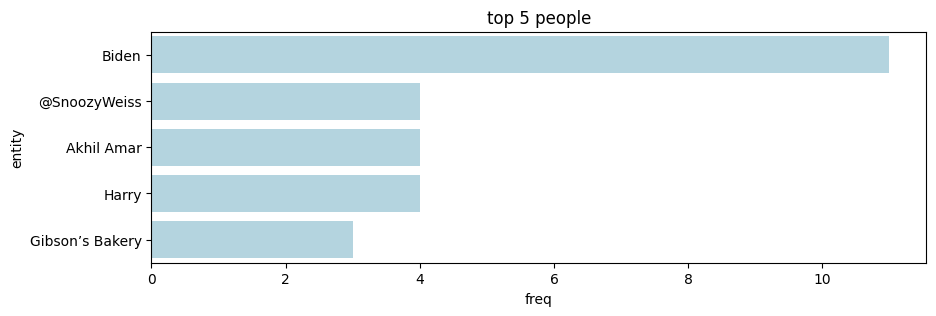

In [13]:
plt.figure(figsize=(10,3))
sns.barplot(res1,x="freq",y="entity", color="lightblue")
plt.title("top 5 people");

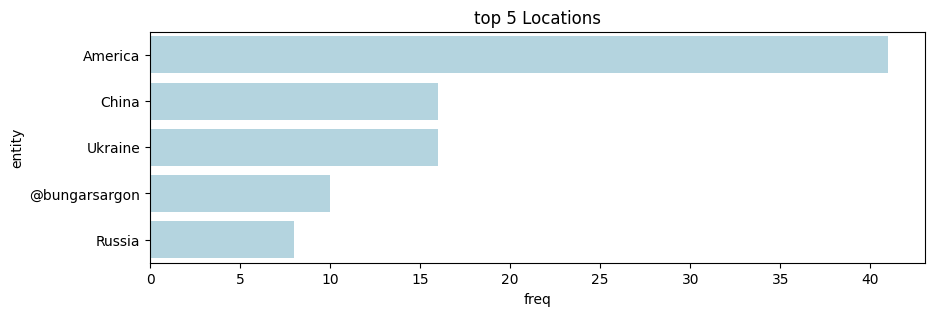

In [14]:
plt.figure(figsize=(10,3))
sns.barplot(res2,x="freq",y="entity", color="lightblue")
plt.title("top 5 Locations");

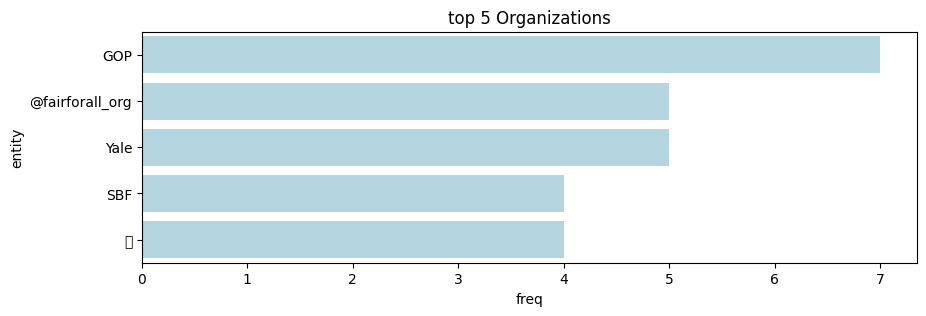

In [15]:
plt.figure(figsize=(10,3))
sns.barplot(res3,x="freq",y="entity", color="lightblue")
plt.title("top 5 Organizations");

# Word Clouds 


---



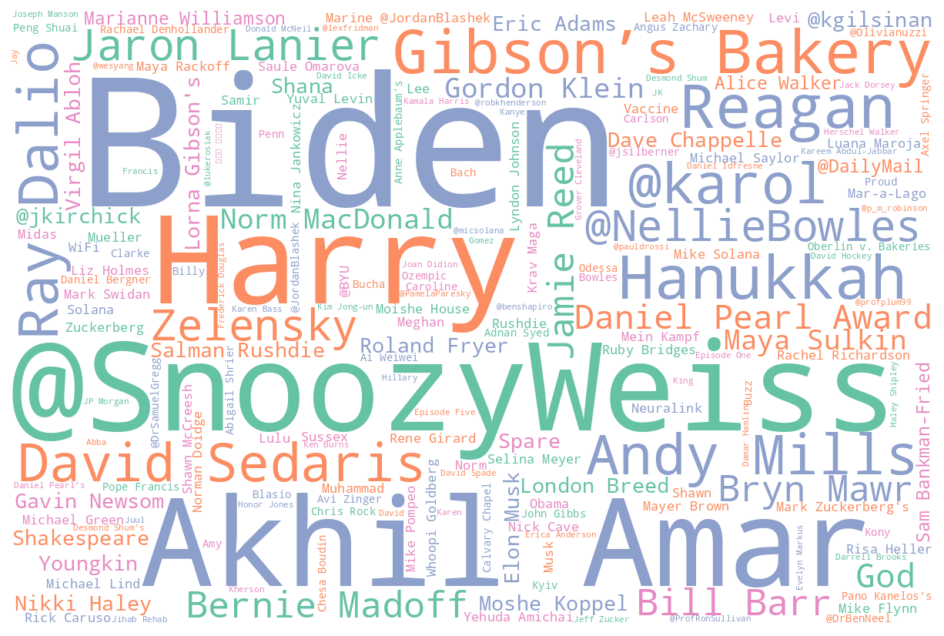

In [25]:
import random
# create a dictionary of entity frequency counts

# people
res1 = (entity_df
        .query("entity_type == 'PERSON'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)
)

# create a dictionary
freq_dict = dict(zip(res1['entity'], res1['freq']))

# Create the wordcloud object with random colors
wordcloud = WordCloud(background_color='white', width=1200, height=800, color_func=lambda *args, **kwargs: random.choice(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']))\
    .generate_from_frequencies(freq_dict)

# Display the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

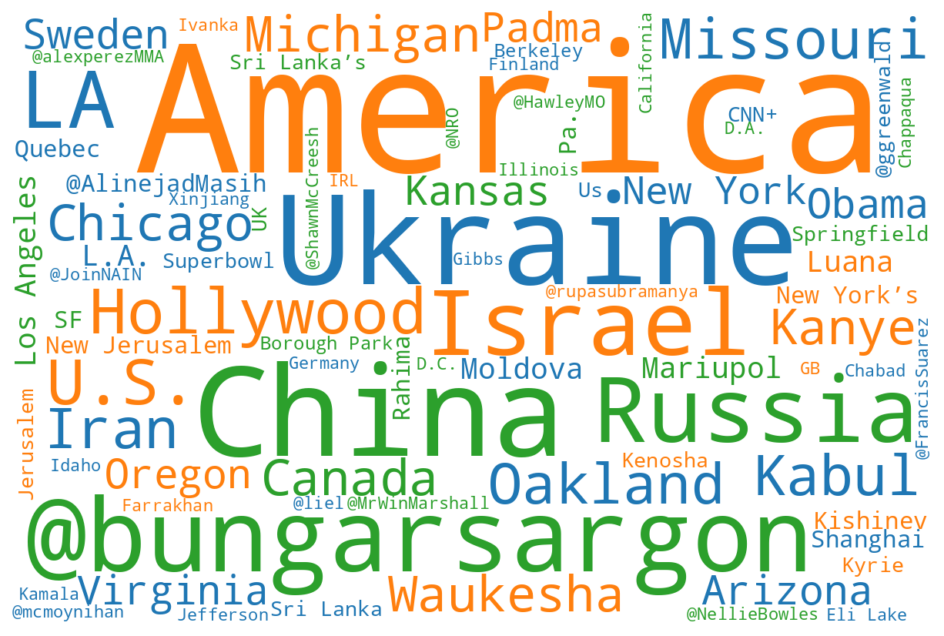

In [24]:
import random

res2 = (entity_df
        .query("entity_type == 'GPE'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)

)

# Create a list of three colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create the LinearSegmentedColormap object
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)


# create a dictionary of entity frequency counts
freq_dict = dict(zip(res2['entity'], res2['freq']))

# Create the wordcloud object with random colors
wordcloud = WordCloud(background_color='white', width=1200, height=800, colormap=cmap)\
    .generate_from_frequencies(freq_dict)

# Display the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

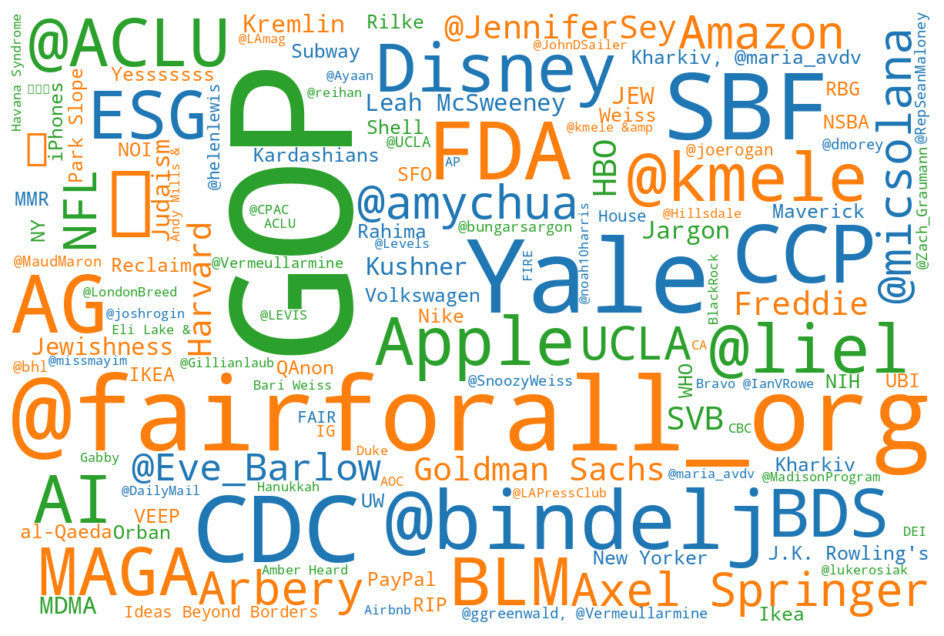

In [23]:

res3 = (entity_df
        .query("entity_type == 'ORG'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
        .sort_values("freq",ascending=False)
)


# Create a list of three colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create the LinearSegmentedColormap object
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)

# create a dictionary of entity frequency counts
freq_dict = dict(zip(res3['entity'], res3['freq']))

# Create the wordcloud object with random colors
wordcloud = WordCloud(background_color='white', width=1200, height=800, colormap=cmap)\
    .generate_from_frequencies(freq_dict)

# Display the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Network Diagrams

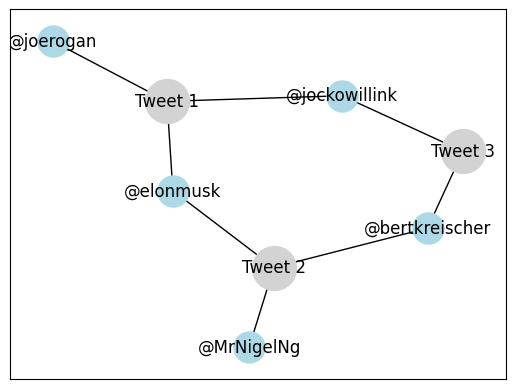

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the people and tweets
people = ['@elonmusk', '@joerogan', '@jockowillink', '@bertkreischer', '@MrNigelNg']
tweets = ['Tweet 1', 'Tweet 2', 'Tweet 3']

# Create a NetworkX graph object
G = nx.Graph()

# Add nodes for each person and tweet
for person in people:
    G.add_node(person, node_color='lightblue', node_size=500)
for tweet in tweets:
    G.add_node(tweet, node_color='lightgrey', node_size=1000)

# Add edges to represent people in each tweet
G.add_edge('@elonmusk', 'Tweet 1')
G.add_edge('@elonmusk', 'Tweet 2')
G.add_edge('@joerogan', 'Tweet 1')
G.add_edge('@jockowillink', 'Tweet 1')
G.add_edge('@jockowillink', 'Tweet 3')
G.add_edge('@bertkreischer', 'Tweet 2')
G.add_edge('@bertkreischer', 'Tweet 3')
G.add_edge('@MrNigelNg', 'Tweet 2')

# Draw the graph using Matplotlib
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=people, node_color='lightblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=tweets, node_color='lightgrey', node_size=1000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


# Lets summarize People mentioned by Date! 

1. Find all the people in the tweets
2. make sure date is a date without minutes and seconds  
3. summarize people by date 

In [27]:
tweets = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_9/data/bariweiss_tweets_4.7.2023.csv")
tweets.head()
tweets["tweet_date"] = pd.to_datetime(tweets["created_at"]).dt.date
tweets.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,timestamp_ms,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,tweet_date
0,2023-04-06T18:05:05Z,1.644039e+18,1644038531512164353,Can ten earnest kids playing Bach become the n...,False,143,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-06
1,2023-04-05T16:57:45Z,1.643659e+18,1643659198415216641,"For 11 years, Mark Swidan has languished in a ...",False,277,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05
2,2023-04-04T16:19:21Z,1.643287e+18,1643287145753239556,Today the resistance will get what it's been c...,False,129,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04


In [28]:
# Initialize Spacy pipeline
nlp = spacy.load("en_core_web_sm")

# Define function to extract people entities from text using Spacy
def get_people(text):
  people = []
  doc = nlp(text)
  for ent in doc.ents:
    if ent.label_ == "PERSON" and not ent.text.startswith("https"):
      people.append(ent.text)
  return people

# Apply function to "full_text" column of DataFrame "tweet" and assign result to new column "people"
tweets["people"] = tweets["full_text"].apply(get_people)

tweets.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,reply_count,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,tweet_date,people
0,2023-04-06T18:05:05Z,1.644039e+18,1644038531512164353,Can ten earnest kids playing Bach become the n...,False,143,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-06,[Bach]
1,2023-04-05T16:57:45Z,1.643659e+18,1643659198415216641,"For 11 years, Mark Swidan has languished in a ...",False,277,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05,[Mark Swidan]
2,2023-04-04T16:19:21Z,1.643287e+18,1643287145753239556,Today the resistance will get what it's been c...,False,129,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,[]


In [29]:
# count number of people found 
tweets["people_count"] = tweets["people"].apply(len)
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,filter_level,metadata,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,tweet_date,people,people_count
0,2023-04-06T18:05:05Z,1.644039e+18,1644038531512164353,Can ten earnest kids playing Bach become the n...,False,143,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-06,[Bach],1
1,2023-04-05T16:57:45Z,1.643659e+18,1643659198415216641,"For 11 years, Mark Swidan has languished in a ...",False,277,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05,[Mark Swidan],1
2,2023-04-04T16:19:21Z,1.643287e+18,1643287145753239556,Today the resistance will get what it's been c...,False,129,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,[],0
3,2023-04-04T16:05:44Z,1.643284e+18,1643283720529387520,As Jews across the world celebrate our liberat...,False,135,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04,[],0
4,2023-04-03T15:19:41Z,1.642910e+18,1642909745525985280,New York City Mayor Eric Adams on today’s epis...,False,93,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-03,[Eric Adams],1


In [30]:
# Filter, Group and concatenate lists of people by DATE
people_by_date = (tweets
                  .query("people_count > 0")
                  .groupby("tweet_date")["people"]
                  .sum()
                  .reset_index()
                  
)
people_by_date.head()

,tweet_date,people
0,2021-07-27,[@thanerosenbaum]
1,2021-08-03,"[Amy Cooper, Christian Cooper, Amy Cooper, Kar..."
2,2021-08-10,"[Cori Bush, @CoriBush]"
3,2021-08-12,[Taige Jensen]
4,2021-08-15,"[@kgilsinan, @kgilsinan]"


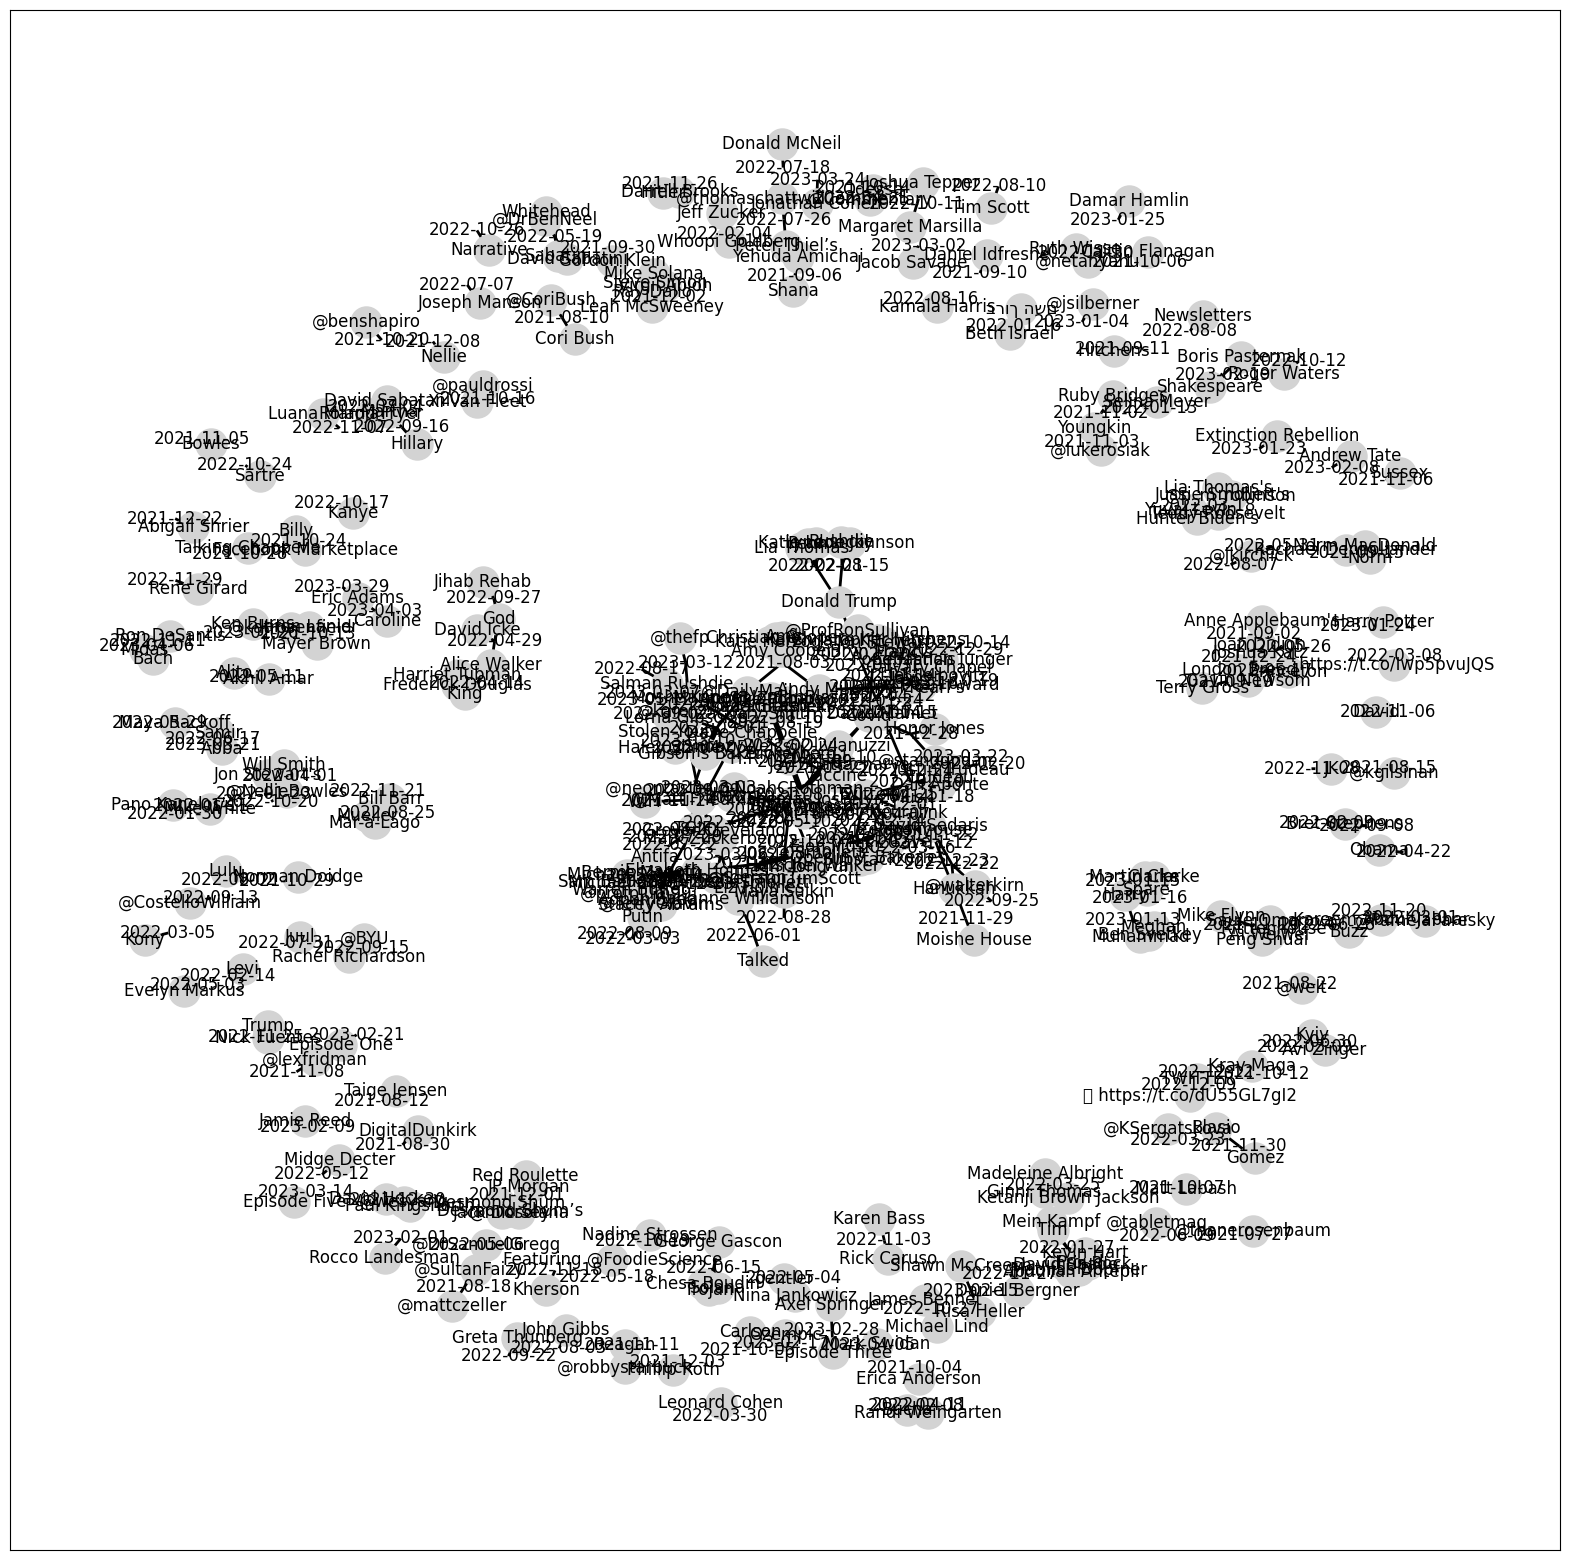

In [33]:
# Create a NetworkX graph object
G = nx.Graph()

# Add nodes for each person and date
for _, row in people_by_date.iterrows():
    date = row['tweet_date']
    people = row['people']
    G.add_node(date)
    for person in people:
        G.add_node(person)
        if G.has_edge(date, person):
            # Increment edge weight if edge already exists
            G[date][person]['weight'] += 1
        else:
            # Add new edge with weight 1 if edge does not exist
            G.add_edge(date, person, weight=1)


# Draw the graph using Matplotlib
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if isinstance(x, str)], node_color='lightgrey', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if isinstance(x, int)], node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=[d['weight']*2 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos)
plt.show()



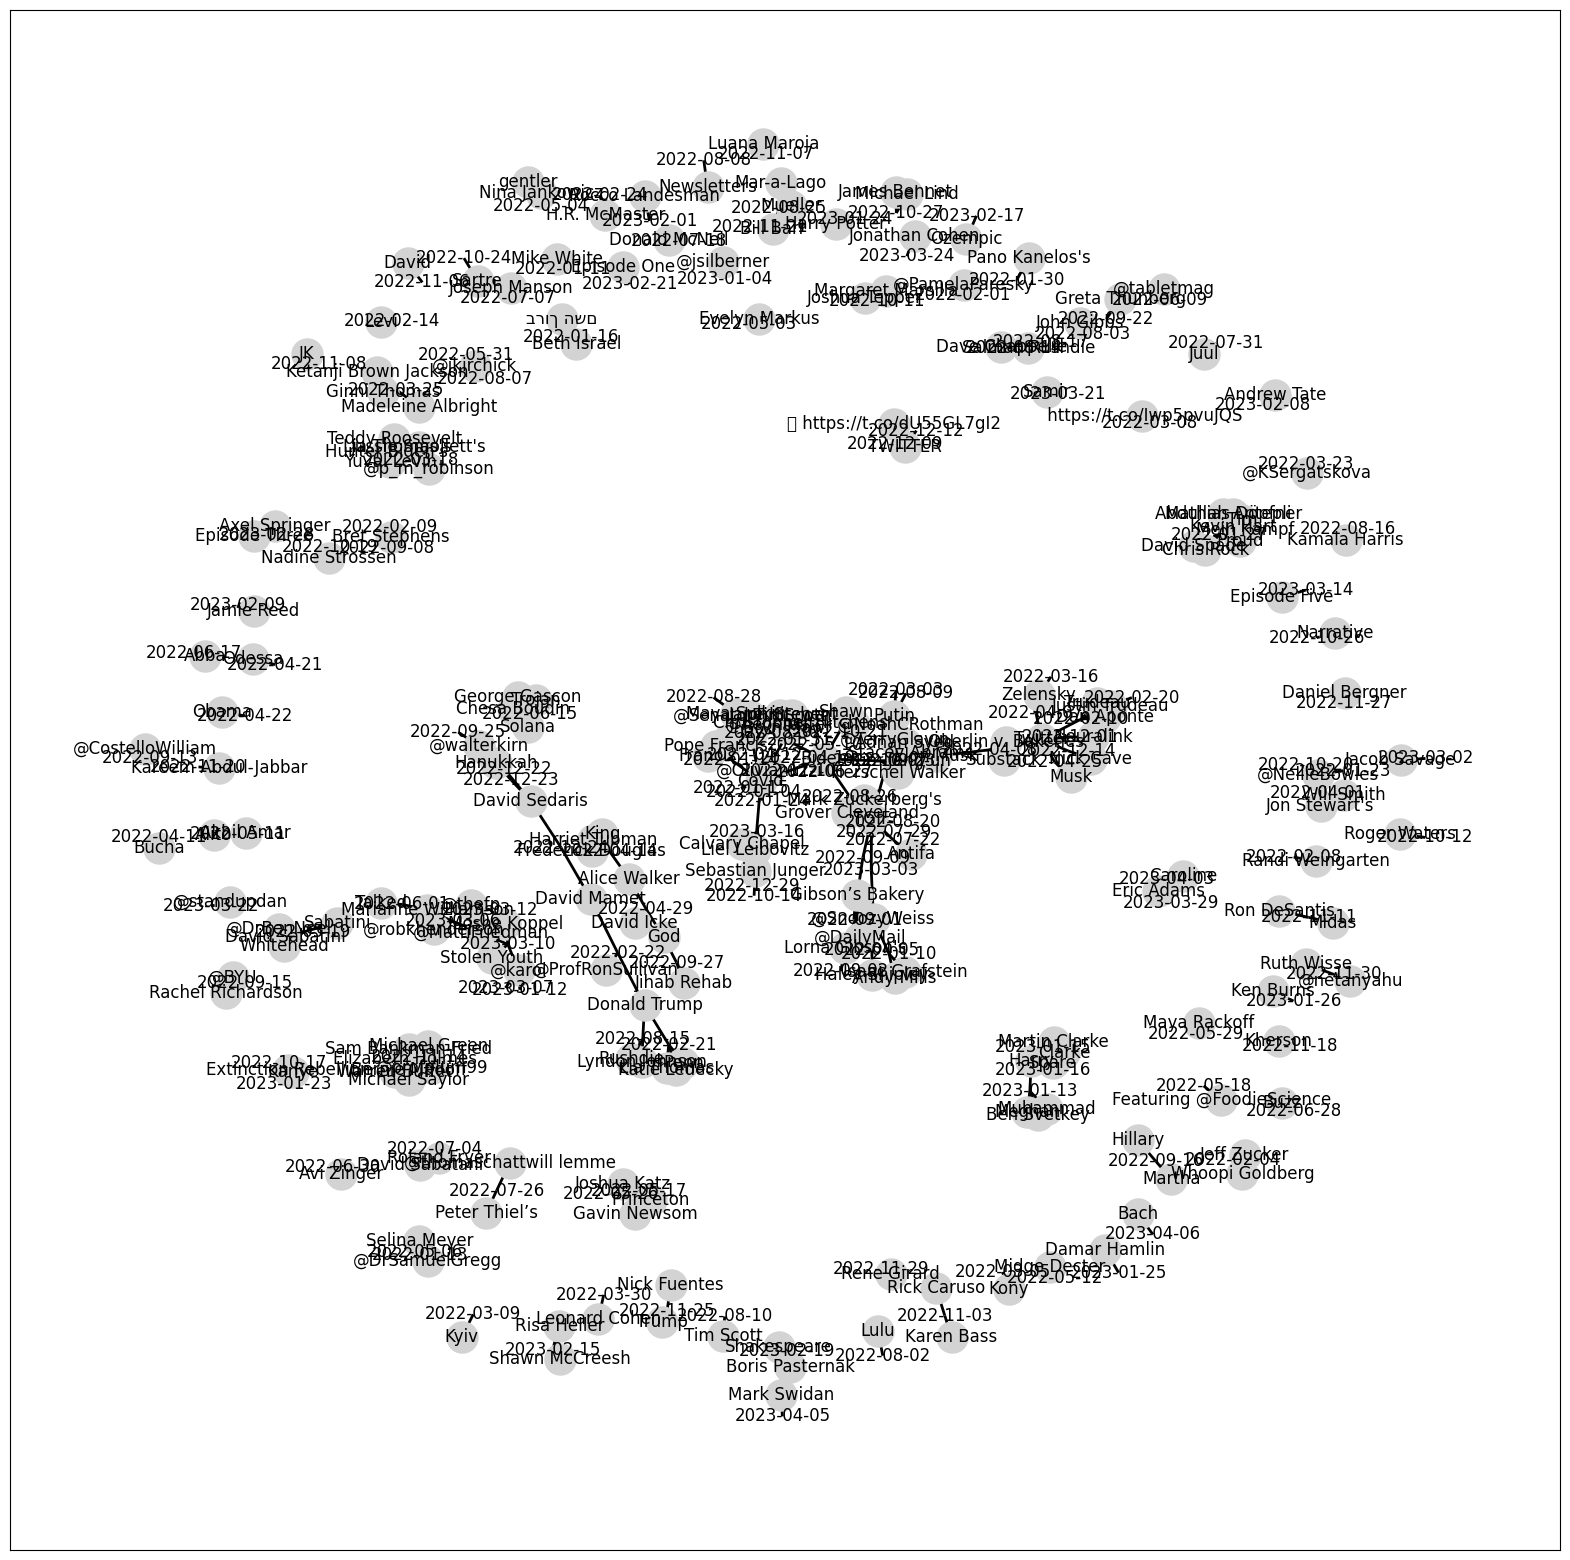

In [36]:
import datetime

# Convert '2023-01-01' to a datetime object
start_date = datetime.datetime.strptime('2022-01-01', '%Y-%m-%d').date()

# Filter the DataFrame using the datetime object
people_in_2023 = people_by_date.query("tweet_date >= @start_date")


# Create a NetworkX graph object
G = nx.Graph()

# Add nodes for each person and date
for _, row in people_in_2023.iterrows():
    date = row['tweet_date']
    people = row['people']
    G.add_node(date)
    for person in people:
        G.add_node(person)
        if G.has_edge(date, person):
            # Increment edge weight if edge already exists
            G[date][person]['weight'] += 1
        else:
            # Add new edge with weight 1 if edge does not exist
            G.add_edge(date, person, weight=1)


# Draw the graph using Matplotlib
fig, ax = plt.subplots(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if isinstance(x, str)], node_color='lightgrey', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if isinstance(x, int)], node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, width=[d['weight']*2 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos)
plt.show()


In [32]:
import spacy

# Load the pre-trained Spacy model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process the text with the Spacy model
doc = nlp(text)

# Print the identified entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY
